In [1]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import load_model
from os import listdir
from numpy import asarray
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [21]:
img_sar1 = load_img('ROIs1970_fall_s1_29_p1105.png')

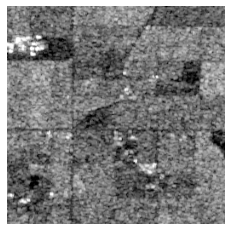

In [23]:
plt.axis('off')
plt.imshow(img_sar1)

In [5]:
model = load_model('g_model_127530.h5')

In [24]:
import numpy as np

img_sar = np.array(img_sar1)
img_sar = (img_sar - 127.5) / 127.5
img_src = []
img_src.append(img_sar)
img_src = np.array(img_src)
print(img_src.shape)

(1, 256, 256, 3)


In [25]:
img_opt = model.predict(img_src)

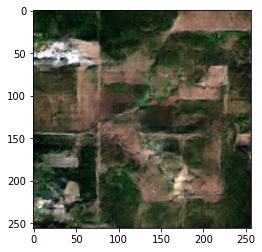

In [26]:
img_tar = (img_opt[0] + 1) / 2.0
plt.imshow(img_tar)

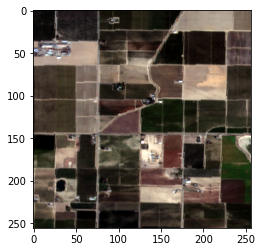

In [27]:
img_actual = load_img('ROIs1970_fall_s2_29_p1105.png')
plt.imshow(img_actual)

<function matplotlib.pyplot.close(fig=None)>

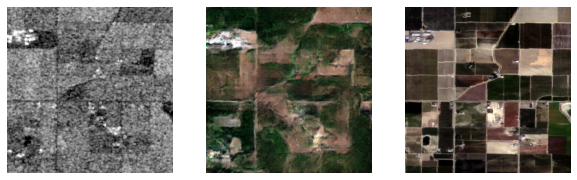

In [30]:
plt.figure(figsize=(10.1,3.45))
plt.subplot(131)
plt.axis('off')
plt.imshow(img_sar1)
plt.subplot(132)
plt.axis('off')
plt.imshow(img_tar)
plt.subplot(133)
plt.axis('off')
plt.imshow(img_actual)
filename1 = 'plot2.png'
plt.savefig(filename1)
plt.close

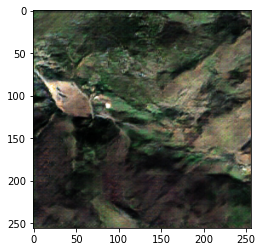

In [56]:
img_opt = model.predict(img_src)
img_tar = (img_opt[0] + 1) / 2.0
plt.imshow(img_tar)

In [1]:
import numpy as np
from os import listdir
from numpy import asarray
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline

# def get_images(batch_size):
    
#     #select SAR image
#     path = 'dog/dog_train/'
#     files = listdir(path)
#     files_len = len(files)
#     print(files_len)
#     rint3 = np.random.randint(0, files_len, batch_size)
#     print(rint3)
#     files_arr = np.array(files)
#     lvl3 = files_arr[rint3]
#     print(lvl3)
    
#     #select RGB image
#     def rgb2gray(rgb):
#         return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#     img = load_img(path + lvl3)
#     img = img_to_array(img)
#     gray = rgb2gray(img)    
#     plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#     plt.show()
    
    #load images
#     img_gray=[]
#     img_opt=[]
#     for i in range(batch_size):
#         img = load_img(path + lvl3[i])
#         img = img_to_array(img)
#         img_sar.append(img)
#         img = load_img(s2_path + temp3[i])
#         img = img_to_array(img)
#         img_opt.append(img)
        
#     img_sar = np.array(img_sar)
#     img_opt = np.array(img_opt)
#     img_sar = (img_sar - 127.5) / 127.5
#     img_opt = (img_opt - 127.5) / 127.5
    
#     return img_sar, img_opt

Using TensorFlow backend.


1200
[475]
['348_256.jpg']


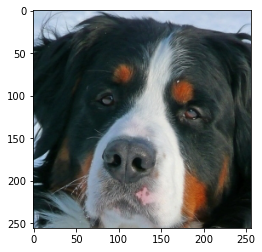

In [72]:
#select SAR image
path = 'dog/dog_train/'
files = listdir(path)
files_len = len(files)
print(files_len)
rint3 = np.random.randint(0, files_len, 1)
print(rint3)
files_arr = np.array(files)
lvl3 = files_arr[rint3]
print(lvl3)
    
    #select RGB image
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = load_img(path + lvl3[0])
# img = img_to_array(img)
# gray = rgb2gray(img)    
# plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

In [3]:
img = load_img('1_256.jpg')
img = img_to_array(img)
img = (img - 127.5) / 127.5
# plt.imshow(img)

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [6]:
import numpy as np

gray = rgb2gray(img)
print(gray.shape)
# plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

(256, 256)


In [7]:
gray = np.stack((gray,)*3, axis=-1)
gray = (gray + 1) / 2.0
img = (img + 1) / 2.0
print(gray.shape)

(256, 256, 3)


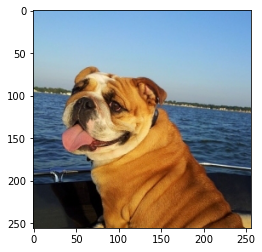

In [8]:
plt.imshow(img)

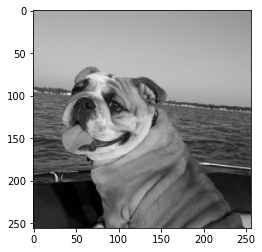

In [9]:
plt.imshow(gray)

In [5]:
noise = np.random.normal(0, 0.2, (256,256,3))
# print(noise)
# noise = abs(noise)
print(noise.shape)

(256, 256, 3)


In [11]:
gray2 = gray+noise
img2 = img+noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


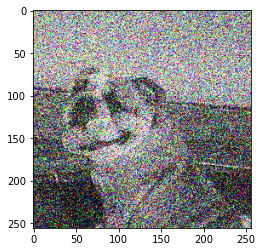

In [12]:
plt.imshow(gray2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


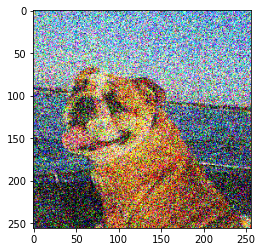

In [13]:
plt.imshow(img2)

(256, 256)


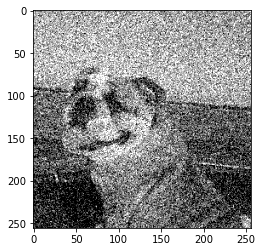

In [14]:
gray3 = rgb2gray(img2)
print(gray3.shape)
plt.imshow(gray3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


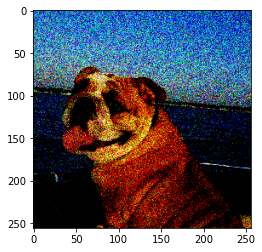

In [33]:
img = load_img('1_256.jpg')
img = img_to_array(img)
img = (img - 127.5) / 127.5
# img = (img + 1) / 2.0
img2 = img+noise
# img2 = (img2 - 127.5) / 127.5
# img2 = (img2 + 1) / 2.0
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


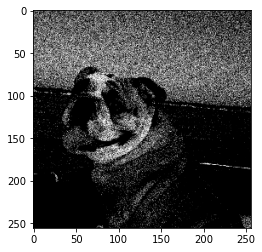

In [34]:
gray = rgb2gray(img2)
gray = np.stack((gray,)*3, axis=-1)
plt.imshow(gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


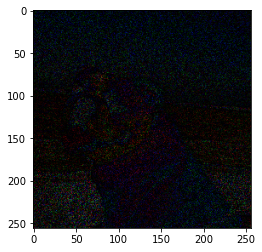

In [6]:
img = load_img('1_256.jpg')
img = img_to_array(img)
img = (img - 127.5) / 127.5
# img = (img + 1) / 2.0
img2 = img*noise
# img2 = (img2 - 127.5) / 127.5
# img2 = (img2 + 1) / 2.0
plt.imshow(img2)

In [10]:
import keras.backend as K


def euclidean_distance_loss(y_true, y_pred):
    """
    Euclidean distance loss
    https://en.wikipedia.org/wiki/Euclidean_distance
    :param y_true: TensorFlow/Theano tensor
    :param y_pred: TensorFlow/Theano tensor of the same shape as y_true
    :return: float
    """
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

In [12]:
# model = load_model('model_006000.h5')

(248, 727, 3)


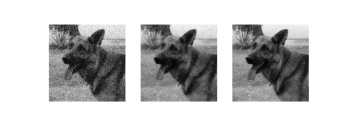

In [16]:
img = load_img('plot_004500.png')
img = np.array(img)
print(img.shape)
plt.axis('off')
plt.imshow(img)

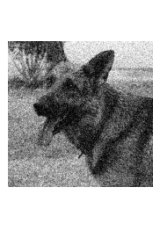

In [21]:
img2 = img[:,90:256,:]
plt.axis('off')
plt.imshow(img2)